# RLS

### Dano Gillam

In [33]:
%matplotlib inline
import matplotlib
import numpy as np
import random
import numpy.linalg as la
import matplotlib.pyplot as plt
import seaborn
plt.rcParams['figure.figsize'] = (10.0, 8.0)


In [34]:
# Generate some random data to fit a line to
n = 10
slope = 3.7
offset = 5
rands = [random.random()*10 for i in xrange(n)]
data = [(x-0.5+random.random(),x*slope+offset-2+random.random()*4) for x in rands]
data.sort()
xpoints, ypoints = zip(*data)

We generate a matrix m and a vector b from our random data. We'll first solve this with OLS, using the la.lstsq function. Plotted are the random data and the OLS solution line.


OLS Solution:  [ 3.77503272  5.93134271]


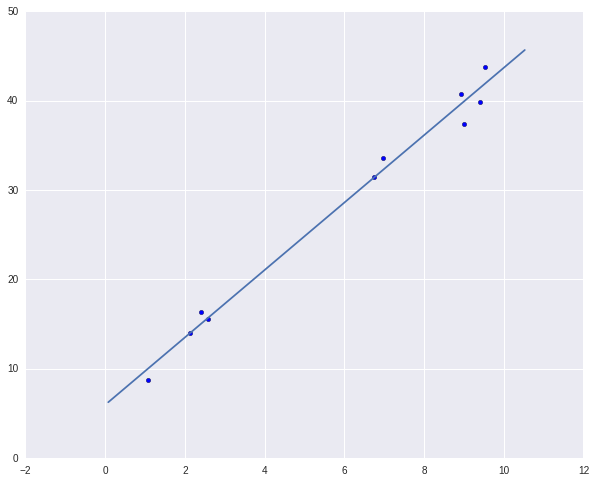

In [35]:
m = np.array([[x,1] for x in xpoints])
b = np.array(ypoints)
x = la.lstsq(m,b)[0]
ols_solution = x.copy()
print "OLS Solution: ", ols_solution

def add_line_to_plot(x):
    def f(z):
        return x[0]*z+x[1]

    xvals = np.linspace(min(xpoints)-1,max(xpoints)+1,200)
    yvals = f(xvals)
    plt.plot(xvals,yvals)

plt.scatter(xpoints,ypoints)
add_line_to_plot(x)
plt.show()


We can also solve the system using weighted least squares. We use W = I.


In [36]:
def weighted_LS(m,W,b):
    temp = m.T.dot(W)
    newM = temp.dot(m)
    newB = temp.dot(b)
    return la.solve(newM,newB)
wls_solution = weighted_LS(m,np.eye(len(b)),b)
print "WLS Solution:", wls_solution

WLS Solution: [ 3.77503272  5.93134271]


This is the RLS solution. We first break the m matrix and the b vector into chunks of size p. This indicates that at each time step we are adding p new rows of data to the solution. Plotted are the random data and the the solution lines at each time step.


RLS Solution: [ 3.77503272  5.93134271]
OLS Solution: [ 3.77503272  5.93134271]
WLS Solution: [ 3.77503272  5.93134271]


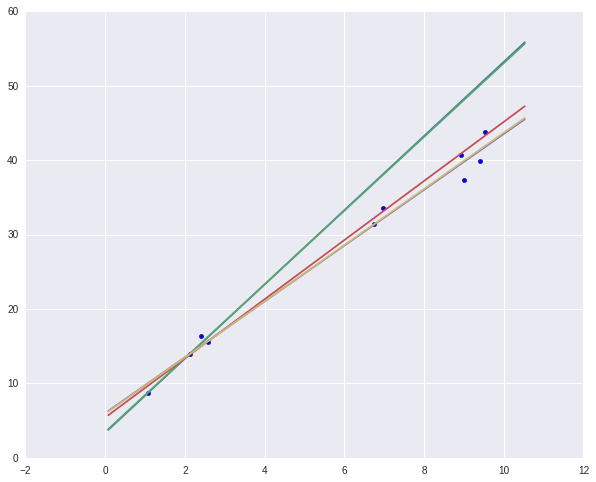

In [38]:
p = 2 # make sure n is divisble by p
A = np.array([m[p*i:p*(i+1)] for i in xrange(n/p)])
B = np.array([b[p*i:p*(i+1)] for i in xrange(n/p)])
R = np.array([np.eye(p) for i in xrange(n/p)])

R0_inv = la.inv(R[0])
init_hess = A[0].T.dot(R0_inv).dot(A[0])
# inital K and x
K = la.inv(init_hess)
x = weighted_LS(A[0],R0_inv,B[0])

for i in xrange(1,n/p):
    add_line_to_plot(x)
    K = K - K.dot(A[i].T.dot(la.inv(R[i]+A[i].dot(K).dot(A[i].T)).dot(A[i].dot(K))))
    x = x - K.dot(np.dot(A[i].T.dot(la.inv(R[i])),A[i].dot(x)-B[i]))

add_line_to_plot(x)
plt.scatter(xpoints,ypoints)
print "RLS Solution:", x
print "OLS Solution:", ols_solution
print "WLS Solution:", wls_solution
plt.show()